In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from useful_functions import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

def prettyshow(grads, legend, save='image.pdf', ylabel='Gradient Norm'):
    plt.rcParams['figure.figsize'] = 12, 8
    
    plt.figure()
    xlen = len(grads[0])
    colors = ['green', 'red', 'blue', 'orange', 'purple', 'brown']
    markers = ['d', '^', 'o', '<', '*', 's']
    idx_set = np.arange(0, xlen, xlen//10)
    
    for i in range(len(grads)):
        plt.semilogy(0, grads[i][0], color=colors[i], marker=markers[i], markersize=8)
    
    for i in range(len(grads)):
        for idx in idx_set:
            plt.semilogy(idx, grads[i][idx], color=colors[i], marker=markers[i], markersize=10, linestyle='None')
    
    for i in range(len(grads)):
        plt.semilogy(np.arange(xlen), grads[i], linewidth=2, color=colors[i])
    
    plt.legend(legend, prop={'size': 23, 'weight': 'bold'},loc='upper right',)
    plt.xlabel('Iteration', fontsize=40, fontweight='bold')
    #plt.ylabel(ylabel, fontsize=40, fontweight='bold')
    
    # 设置科学记数法格式
    ax = plt.gca()
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    formatter.set_powerlimits((3, 6))  # 当数值超过1e3或1e6时使用科学记数法
    ax.xaxis.set_major_formatter(formatter)
    
    # 调整刻度数量和间隔
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    
    # 设置刻度标签和偏移文本的字体
    plt.xticks(fontsize=35, fontweight='bold')
    plt.yticks(fontsize=35, fontweight='bold')
    ax.xaxis.get_offset_text().set_fontsize(25)  # 调整科学记数法指数字体大小
    ax.xaxis.get_offset_text().set_fontweight('bold')
    
    plt.grid(True)
    plt.subplots_adjust(left=0.21, bottom=0.15)
    plt.savefig(save, bbox_inches='tight')
    plt.show()

In [3]:
def iteration_test(
    A: np.ndarray,
    num_iter: int,
)->list:
    n = A.shape[0]
    np.random.seed(23)
    z0 = np.random.rand(n)
    V = np.eye(n)
    z = deepcopy(z0)
    bar_z = np.ones(n)*np.sum(z0)/n

    norm = np.linalg.norm(z0-bar_z)
    print("|z0-bar_z|=",norm)
    
    norm_list = []

    for _ in range(num_iter):
        V = A @ V
        nV = n * V
        Diag_nV_inverse = np.diag(1 / np.diag(nV))
        z = V @ Diag_nV_inverse @ z0

        z_norm = np.linalg.norm(z-bar_z)/norm
        norm_list.append(z_norm)

    return norm_list

In [5]:
n=15
minimum = 1
index = 0

for i in range(10000):
    A=get_xinmeng_like_matrix(n,seed=i).T#16102
    beta = compute_beta_row(A)
    kappa = compute_kappa_row(A)
    if minimum > beta  :
        minimum = beta
        index = i
        print(minimum,index)
        print(f"kappa={kappa:.4f}\n")

0.8872407762561162 0
kappa=315240.4266

0.8666636606869128 1
kappa=3193208.1657

0.8309782114981551 2
kappa=5243228.6914

0.8274900735686511 21
kappa=9307.3912

0.8044377650396859 25
kappa=26636.7418

0.7974736885662115 50
kappa=1445748.1976

0.7924953743816212 271
kappa=113385.7745

0.7628679138594392 293
kappa=66047.5664

0.7566058799790808 359
kappa=63799340.3715

0.749282715456724 491
kappa=73413574.7823

0.7356230021094565 4160
kappa=664888.5941



In [4]:
n=15
A=get_xinmeng_like_matrix(n,seed=4160).T#16102
I = np.eye(n)
a = 0.99
A = (1-a)*A + a*I
show_row(A)

A的第二大特征值: 0.9895324057149544
A的beta: 0.9971597066283117
A的spectral gap: 0.0028402933716883405
A的kappa: 664888.595042994
S_A是: 39291.379643528446 



A的第二大特征值: 0.4750687220057565
A的beta: 0.7680215220991605
A的spectral gap: 0.23197847790083947
A的kappa: 5347.29017839069
S_A是: 261.3032122341882 

|z0-bar_z|= 0.7579176636908711



A的第二大特征值: 0.17112011069334868
A的beta: 0.8752761553089922
A的spectral gap: 0.12472384469100783
A的kappa: 9835.829857120696
S_A是: 633.0845203028839 

|z0-bar_z|= 1.0786934394738164



A的第二大特征值: 0.5167410522541537
A的beta: 0.9257932716763831
A的spectral gap: 0.07420672832361686
A的kappa: 9835.829857173381
S_A是: 1064.064366808228 

|z0-bar_z|= 1.0786934394738164
A的第二大特征值: 0.6369421495719556
A的beta: 0.943771178473087
A的spectral gap: 0.056228821526913
A的kappa: 9835.829857159122
S_A是: 1404.275125146898 

|z0-bar_z|= 1.0786934394738164


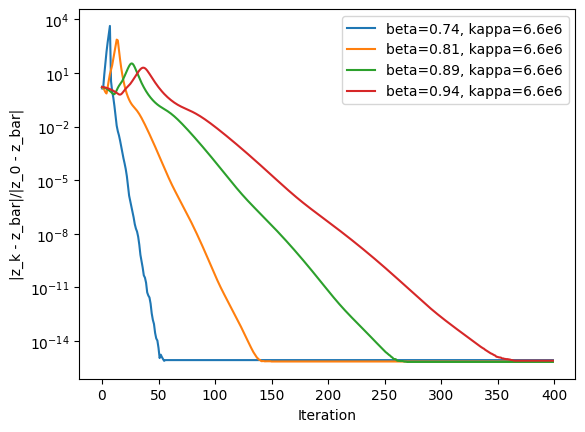

In [5]:
ite=400

n=10
A=get_xinmeng_like_matrix(n,seed=9).T#16102
I = np.eye(n)
a = 0
A = (1-a)*A + a*I
show_row(A)
l1 = iteration_test(A, ite)
print("\n\n")

n=15
A=get_xinmeng_like_matrix(n,seed=9).T#16102
I = np.eye(n)
a = 0.3
A = (1-a)*A + a*I
show_row(A)
l2 = iteration_test(A, ite)
print("\n\n")

n=15
A=get_xinmeng_like_matrix(n,seed=9).T#16102
I = np.eye(n)
a = 0.6
A = (1-a)*A + a*I
show_row(A)
l3 = iteration_test(A, ite)

n=15
A=get_xinmeng_like_matrix(n,seed=9).T#16102
I = np.eye(n)
a = 0.7
A = (1-a)*A + a*I
show_row(A)
l4 = iteration_test(A, ite)

import matplotlib.pyplot as plt

# 横轴是迭代次数，即列表的索引
iterations = range(len(l1))

# 使用 semilogy 绘制三条曲线，并在 label 中包含 beta 和 kappa 的信息
plt.semilogy(iterations, l1, label='beta=0.74, kappa=6.6e6')
plt.semilogy(iterations, l2, label='beta=0.81, kappa=6.6e6')
plt.semilogy(iterations, l3, label='beta=0.89, kappa=6.6e6')
plt.semilogy(iterations, l4, label='beta=0.94, kappa=6.6e6')

# 设置横轴和纵轴标签
plt.xlabel('Iteration')
plt.ylabel('|z_k - z_bar|/|z_0 - z_bar|')

# 添加图例
plt.legend()

# 显示图表
plt.show()

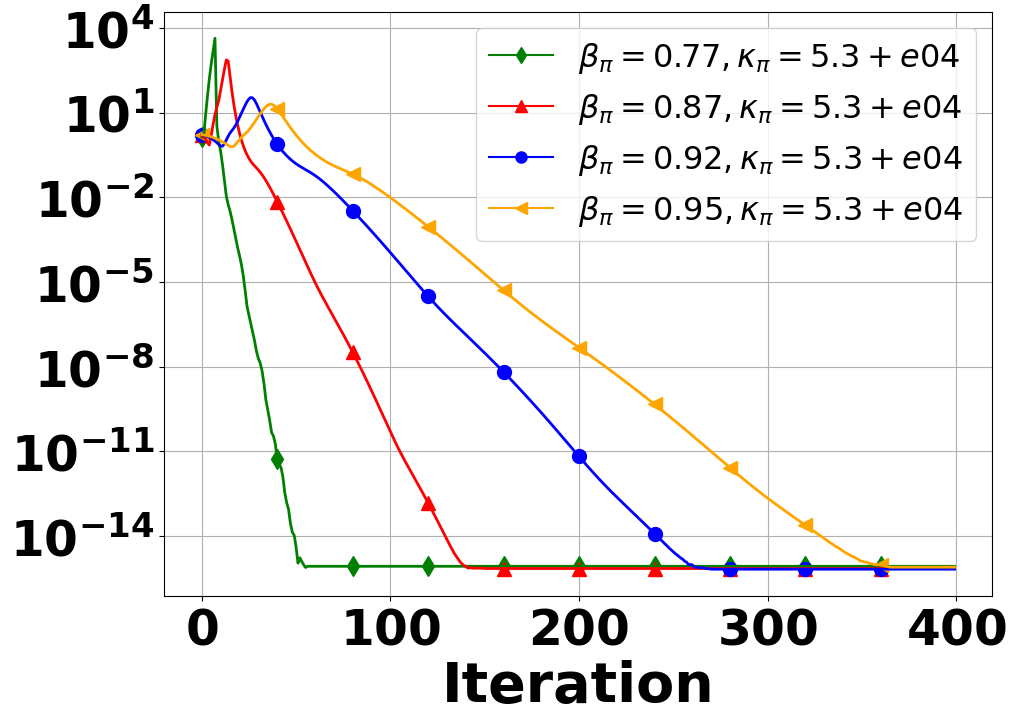

In [6]:
# 将数据列表放入一个列表中
grads = [l1, l2, l3, l4]

# 提供图例
legend = [
    r"$\beta_{\pi}=0.77, \kappa_{\pi}=5.3+e04$",
    r"$\beta_{\pi}=0.87, \kappa_{\pi}=5.3+e04$",
    r"$\beta_{\pi}=0.92, \kappa_{\pi}=5.3+e04$",
    r"$\beta_{\pi}=0.95, \kappa_{\pi}=5.3+e04$",
]

# 调用 prettyshow 函数
prettyshow(grads, legend, save="fix_kappa_20240125.pdf", ylabel="Consensus Error")

A的第二大特征值: 0.3033302085782111
A的beta: 0.9004640292334154
A的spectral gap: 0.0995359707665846
A的kappa: 9307.391172853218
S_A是: 788.9909479500533 

|z0-bar_z|= 1.0786934394738164



A的第二大特征值: 0.8171002072680345
A的beta: 0.8999663298586535
A的spectral gap: 0.10003367014134645
A的kappa: 26636.741757151998
S_A是: 866.485551917104 

|z0-bar_z|= 1.0786934394738164



A的第二大特征值: 0.6557872052196364
A的beta: 0.8999376354220354
A的spectral gap: 0.10006236457796458
A的kappa: 73413574.71574692
S_A是: 1479.4570173833376 

|z0-bar_z|= 1.0786934394738164
A的第二大特征值: 0.8408710088947715
A的beta: 0.9008293387635881
A的spectral gap: 0.09917066123641194
A的kappa: 17646444471.670822
S_A是: 1920.9588244660863 

|z0-bar_z|= 1.0786934394738164


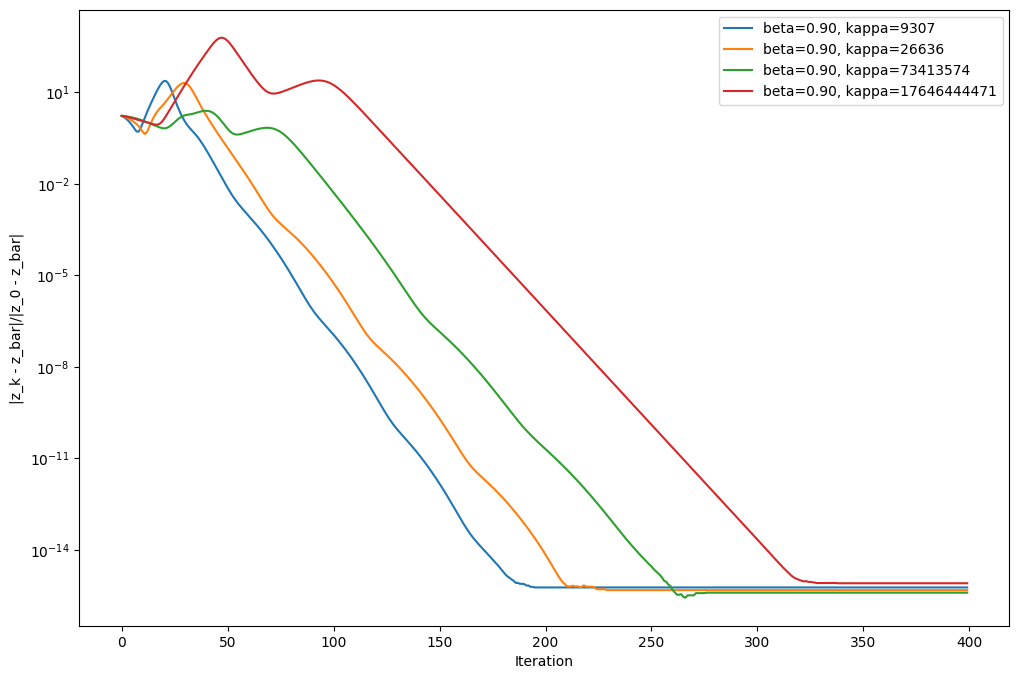

In [7]:
ite=400

n=15
A=get_xinmeng_like_matrix(n,seed=21).T#16102
I = np.eye(n)
a = 0.51
A = (1-a)*A + a*I
show_row(A)
l1 = iteration_test(A, ite)
print("\n\n")

n=15
A=get_xinmeng_like_matrix(n,seed=25).T#16102
I = np.eye(n)
a = 0.55
A = (1-a)*A + a*I
show_row(A)
l2 = iteration_test(A, ite)
print("\n\n")

n=15
A=get_xinmeng_like_matrix(n,seed=491).T#16102
I = np.eye(n)
a = 0.665
A = (1-a)*A + a*I
show_row(A)
l3 = iteration_test(A, ite)

n=15
A=get_xinmeng_like_matrix(n,seed=136).T#16102
I = np.eye(n)
a = 0.568
A = (1-a)*A + a*I
show_row(A)
l4 = iteration_test(A, ite)

import matplotlib.pyplot as plt

# 横轴是迭代次数，即列表的索引
iterations = range(len(l1))

# 使用 semilogy 绘制三条曲线，并在 label 中包含 beta 和 kappa 的信息
plt.semilogy(iterations, l1, label='beta=0.90, kappa=9307')
plt.semilogy(iterations, l2, label='beta=0.90, kappa=26636')
plt.semilogy(iterations, l3, label='beta=0.90, kappa=73413574')
plt.semilogy(iterations, l4, label='beta=0.90, kappa=17646444471')

# 设置横轴和纵轴标签
plt.xlabel('Iteration')
plt.ylabel('|z_k - z_bar|/|z_0 - z_bar|')

# 添加图例
plt.legend()

# 显示图表
plt.show()

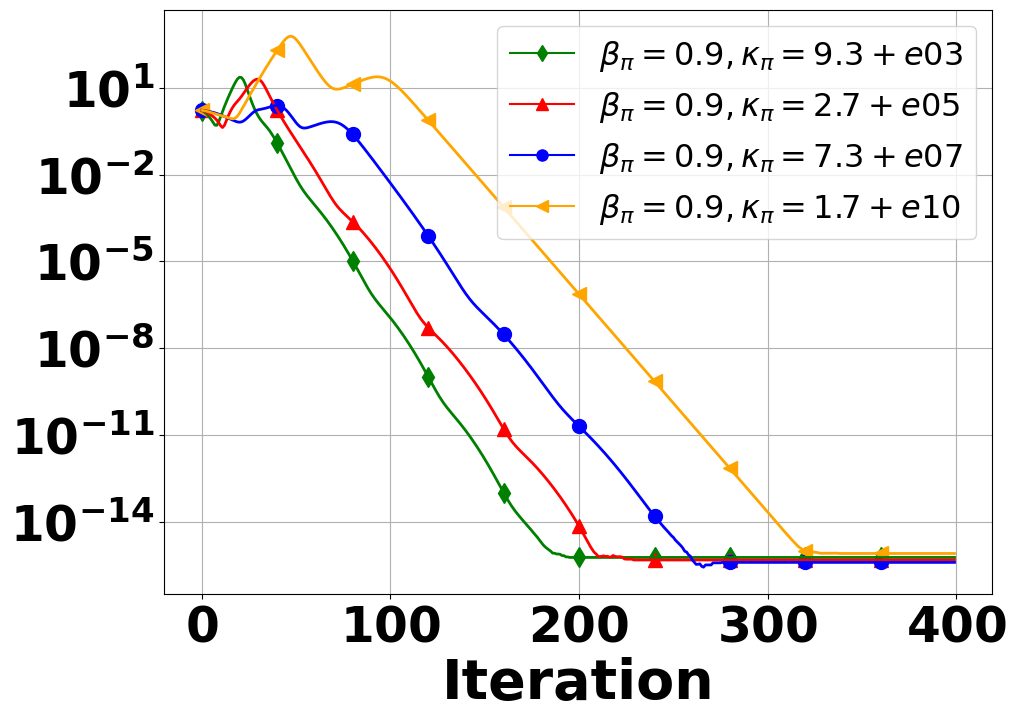

In [8]:
# 将数据列表放入一个列表中
grads = [l1, l2, l3, l4]

# 提供图例
legend = [
    r"$\beta_{\pi}=0.9, \kappa_{\pi}=9.3+e03$",
    r"$\beta_{\pi}=0.9, \kappa_{\pi}=2.7+e05$",
    r"$\beta_{\pi}=0.9, \kappa_{\pi}=7.3+e07$",
    r"$\beta_{\pi}=0.9, \kappa_{\pi}=1.7+e10$",
]

# 调用 prettyshow 函数
prettyshow(grads, legend, save="fix_beta_20240123.pdf", ylabel="Consensus Error")